In [24]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

<Axes: xlabel='x', ylabel='p'>

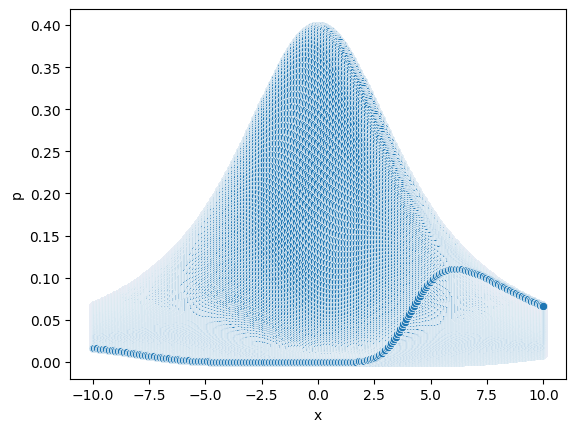

In [63]:
def f(x):
    return 0.5*x + 1

def p_f(y, x):
    sigma = 1 + 0.05*x**2
    mu = f(x)
    return (1/(np.sqrt(2*np.pi*sigma**2)))*(np.exp(-(y-mu)**2/(2*sigma**2)))

x = np.linspace(-10, 10, 300)
y = np.linspace(-6, 6, 300)

xx, yy = np.meshgrid(x, y)
p_y_vals = p_f(yy, xx)

df = pd.DataFrame(columns = ["x", "y"], index = range(len(xx.flatten())))
df["x"] = xx.flatten()
df["y"] = yy.flatten()
df["p"] = p_y_vals.flatten()
sn.scatterplot(df, y="p", x="x")

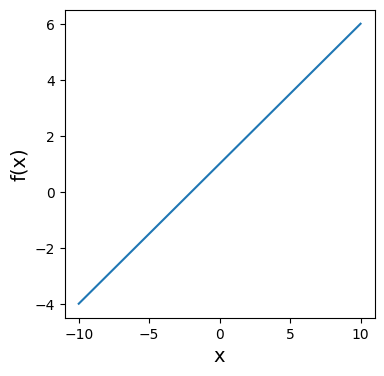

In [64]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (4, 4))
ax.plot(x, f(x))
ax.set_xlabel("x", fontsize=14)
ax.set_ylabel("f(x)", fontsize=14)
plt.show()

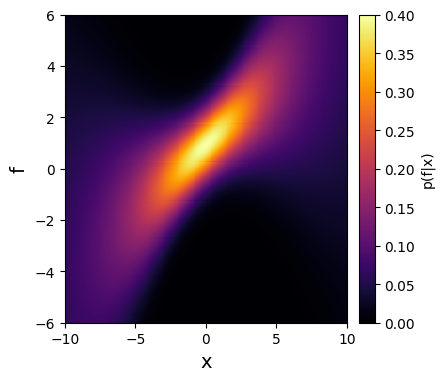

In [65]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (4, 4))
hue_norm_prob = mpl.colors.Normalize(vmin=0, vmax=0.4, clip=False)
ax.hist2d(x= df["x"], y=df["y"], weights=df["p"], 
        bins = 300,
        norm = hue_norm_prob,
        cmap="inferno", rasterized=True, edgecolor='face')
ax.set_xlabel("x", fontsize=14)
ax.set_ylabel("f", fontsize=14)
fig.colorbar(mpl.cm.ScalarMappable(norm=hue_norm_prob, cmap="inferno"),  fraction=0.050, pad=0.04,
                 label=r"p(f|x)", ax=ax)
plt.show()